<a href="https://colab.research.google.com/github/sebas-serrano/AnaliticaeIA/blob/main/Copia_de_Sesi%C3%B3n_1_M%C3%B3dulo_6_1_k_means_clustering_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar las librerías

In [ ]:
#https://numpy.org/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparación de datos

### Importar la base de datos

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv')

dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Encoder - trabajar con categorías

 Este código aplica la codificación de etiquetas a los datos en la columna 'Genre' de un conjunto de datos utilizando LabelEncoder, lo que permite convertir las categorías en valores numéricos para que puedan ser utilizados más fácilmente en algoritmos de aprendizaje automático que requieren entradas numéricas.

In [ ]:
from sklearn import preprocessing

# El LabelEncoder es una herramienta de Scikit-learn que se utiliza para convertir las etiquetas de clases categóricas en valores numéricos
LE = preprocessing.LabelEncoder()

# Ajustar (fit) el codificador a los datos categóricos específicos en la columna 'Genre' del conjunto de datos
# Es decir asigna un número entero
LE.fit(dataset['Genre'])

# Transformar los valores categóricos en la columna 'Genre' a valores numéricos
dataset['Genre'] = LE.transform(dataset['Genre'].values)
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
LE.classes_

array(['Female', 'Male'], dtype=object)

In [ ]:
# Imprimir las clases
print(dict(zip(LE.classes_, LE.transform(LE.classes_))))

{'Female': np.int64(0), 'Male': np.int64(1)}


### Normalización y estandarización de datos

Tanto la **normalización** como la **estandarización** son técnicas utilizadas para preparar los datos antes de aplicar algoritmos de clustering. La elección entre una u otra **depende del algoritmo específico que planeas usar** y de la naturaleza de tus datos. Ambas técnicas tienen sus ventajas y se utilizan en diferentes contextos.

* **Normalización**:
La normalización generalmente se refiere a escalar los datos para que tengan una **escala similar**. Esto es especialmente útil cuando los datos tienen diferentes **rangos** y **unidades**. Un enfoque común es escalar los datos a un **rango de [0, 1]**, lo que asegura que todas las características tengan **igual peso** en el proceso de clustering. Esto puede ser beneficioso para algoritmos sensibles a las escalas, como K-Means, ya que **evita que las características con magnitudes más grandes dominen** el proceso de clustering.

* **Estandarización**:
La **estandarización** implica escalar los datos para que tengan una **media de cero** y una **desviación estándar de uno**. Esto es útil cuando los datos tienen diferentes distribuciones y varianzas. Estandarizar los datos es especialmente relevante para algoritmos que se basan en la **distancia**, como ***K-Means***, ya que garantiza que todas las características contribuyan de manera equitativa a la distancia entre puntos.



---

#### Elección según algoritmo:

* Para ***K-Means***, que se basa en la distancia entre puntos, la **estandarización** es a menudo preferible ya que ayuda a que las características contribuyan de manera equitativa. Si estás utilizando un algoritmo sensible a las escalas y las unidades, como ***K-Means***, la estandarización suele ser una elección segura.

* Para algoritmos que **no se basan en la distancia**, otro tipo de **normalización** podría ser suficiente. Por ejemplo, si utilizas un algoritmo que se basa en la similitud de coseno, como el clustering jerárquico con enlace de coseno, la normalización podría ser más apropiada.

Sin embargo, es importante experimentar con ambas técnicas y evaluar cómo afectan los resultados de clustering en tu conjunto de datos específico.



---



Utilizaremos **StandardScaler** para hacer el proceso de estandarización de los valores. La librería en dónde se explica el StandardScaler es : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Pasos para estandarizar los datos:
* Se crea una instancia de **StandardScaler** utilizando el constructor `StandardScaler()`. Luego, se llama al método `fit_transform()` en esta instancia y se le pasa el conjunto de datos (dataset) para realizar la estandarización.

* El método **`fit_transform()`** primero ajusta (`fit`) el escalador a los datos y luego realiza la estandarización (`transform`) aplicando la fórmula **(valor - media) / desviación estándar** a cada característica en el conjunto de datos. Como resultado, **scaled_features** contendrá las características del conjunto de datos estandarizadas.



In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(dataset)
scaled_features

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [ ]:
# En este paso solamente regresa los datos estandarizados (la matriz) al dataframe
# Mantiene la estructura de los datos originales

scaled_features_df = pd.DataFrame(scaled_features, index=dataset.index, columns=dataset.columns)
scaled_features_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,1.688771,1.128152,-0.491602,2.497807,0.923953
198,1.706091,1.128152,-0.491602,2.917671,-1.250054


In [ ]:
# Seleccionamos únicamente las columnas de Annual Income y Spending Score
# Utilizamos la función de iloc para seleccionar las columnas deseadas

#df = dataset.iloc[:, 2:4].values
df = scaled_features_df.iloc[:, [3, 4]].values
df

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Método del codo

Librería k-means: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Guía: https://scikit-learn.org/stable/modules/clustering.html#k-means

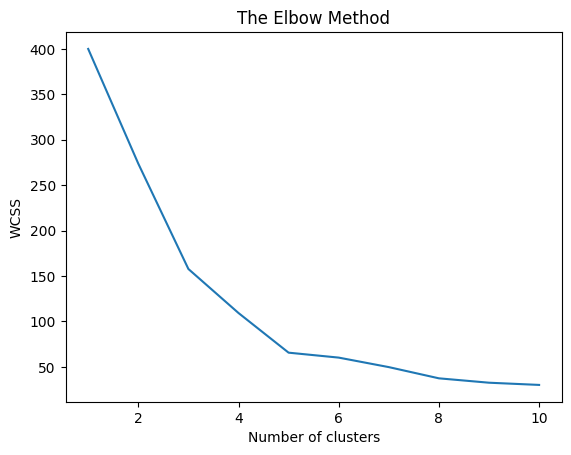

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #Iniciando el modelo
    kmeans.fit(df)  #Corremos el modelo
    wcss.append(kmeans.inertia_)  # append : Append rows of other to the end of caller, returning a new object.

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Entrenar el modelo de K-Means

In [ ]:
from sklearn.cluster import KMeans
# Crea los parametros para el modelo de kmeans
kmeans = KMeans(
    init="k-means++", #Por defecto se inicia con k-means++. Realiza varias pruebas en cada paso de muestreo y elige el mejor centroide entre ellos.
    n_clusters=5,
    #n_init=10,  #Número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroides. Por defecto es 10 el valor.
    max_iter=300, #Número máximo de iteraciones del algoritmo k-means para una sola ejecución. Por defecto el valor es 300.
    random_state=42  #El uso de un numero producirá los mismos resultados en diferentes corridas.
)

In [ ]:
# Ajusta el modelo
y_kmeans = kmeans.fit_predict(df)   # Nos da el cluster/grupo de cada registro
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
# kmeans.labels_: Este es un atributo del modelo K-Means que contiene las etiquetas asignadas por el algoritmo a cada punto de datos.
# Cada etiqueta representa a qué clúster pertenece ese punto.
labels = kmeans.labels_     # Tiene mismos valores que y_kmeans
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
# Se obervan los centros de los 5 clusteres
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [ ]:
# Convierte las etiquetas asignadas en una lista de Python.
# Esto se hace para que las etiquetas sean más fáciles de agregar como columna en el DataFrame.
dataset['Predicted']=kmeans.labels_.tolist()
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predicted
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


## Visualizar los clusters

Este código parece estar utilizando la librería matplotlib para crear un gráfico de dispersión que representa un análisis de clusters realizado con el algoritmo K-Means. Aquí hay una explicación línea por línea:

* `plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')`: En esta línea se están graficando los puntos del **primer** cluster (Cluster 1). `df[y_kmeans == 0, 0]` selecciona las c**oordenadas x** de los puntos en el cluster 1, y `df[y_kmeans == 0, 1]` selecciona las **coordenadas y**. Los argumentos `s` y `c` controlan el tamaño y el color de los puntos, respectivamente. El argumento `label` agrega una etiqueta descriptiva para este cluster en la leyenda del gráfico.

* Las líneas siguientes (hasta la sexta línea) son similares a la primera línea, pero representan los puntos de los clusters 2, 3, 4 y 5, respectivamente. Cambian los índices `y_kmeans == 1`, `y_kmeans == 2`, etc., para seleccionar los puntos correspondientes a cada cluster, y los colores cambian para diferenciar visualmente los clusters.

* `plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')`: Esta línea representa los **centroides** de los clusters encontrados por el algoritmo K-Means. Los centroides son puntos que representan el centro de cada cluster. `kmeans.cluster_centers_[:, 0]` y `kmeans.cluster_centers_[:, 1]` obtienen las **coordenadas x e y** de los centroides, respectivamente. El argumento `s` controla el tamaño de los puntos que representan los centroides, y el argumento `c` establece el color de los puntos en amarillo. La etiqueta "Centroids" se mostrará en la leyenda.

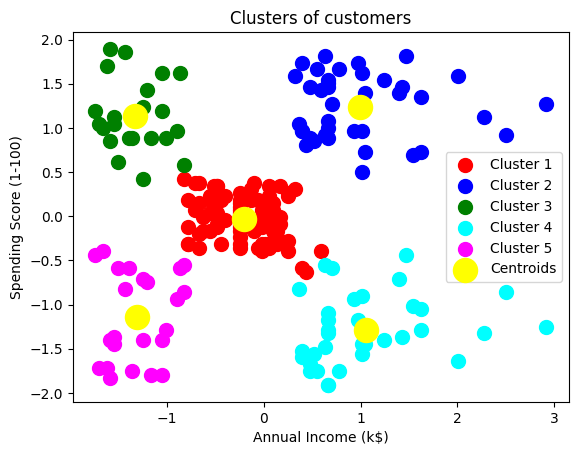

In [ ]:
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df[y_kmeans == 3, 0], df[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[y_kmeans == 4, 0], df[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Estadística descriptiva de los clusters

In [ ]:
dataset.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predicted
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000,1.400000
std,57.879185,0.497633,13.969007,26.264721,25.823522,1.449311
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,0.000000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,3.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000,4.000000


In [ ]:
# Poner la opción de columnas máximas utilizando set_option
pd.set_option('display.max_columns', None)

In [ ]:
dataset.groupby(['Predicted']).describe()

CustomerID                                                     \
               count        mean        std    min    25%    50%    75%   
Predicted                                                                 
0               81.0   86.320988  24.240889   44.0   66.0   86.0  106.0   
1               39.0  162.000000  22.803509  124.0  143.0  162.0  181.0   
2               22.0   23.090909  13.147185    2.0   12.5   23.0   33.5   
3               35.0  164.371429  21.457325  125.0  148.0  165.0  182.0   
4               23.0   23.000000  13.564660    1.0   12.0   23.0   34.0   

                 Genre                                                Age  \
             max count      mean       std  min  25%  50%  75%  max count   
Predicted                                                                   
0          143.0  81.0  0.407407  0.494413  0.0  0.0  0.0  1.0  1.0  81.0   
1          200.0  39.0  0.461538  0.505035  0.0  0.0  0.0  1.0  1.0  39.0   
2           46.0  22.0  0.409091  0.503236  0.0  0.0  0.0  1.0  1.0  22.0   
3          199.0  35.0  0.542857  0.505433  0.0  0.0  1.0  1.0  1.0  35.0   
4           45.0  23.0  0.391304  0.499011  0.0  0.0  0.0  1.0  1.0  23.0   

                                                                 \
                mean        std   min    25%   50%    75%   max   
Predicted                                                         
0          42.716049  16.447822  18.0  27.00  46.0  54.00  70.0   
1          32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
2          25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   
3          41.114286  11.341676  19.0  34.00  42.0  47.50  59.0   
4          45.217391  13.228607  19.0  35.50  46.0  53.50  67.0   

          Annual Income (k$)                                                  \
                       count       mean        std   min    25%   50%    75%   
Predicted                                                                      
0                       81.0  55.296296   8.988109  39.0  48.00  54.0  62.00   
1                       39.0  86.538462  16.312485  69.0  75.50  79.0  95.00   
2                       22.0  25.727273   7.566731  15.0  19.25  24.5  32.25   
3                       35.0  88.200000  16.399067  70.0  77.50  85.0  97.50   
4                       23.0  26.304348   7.893811  15.0  19.50  25.0  33.00   

                 Spending Score (1-100)                                    \
             max                  count       mean        std   min   25%   
Predicted                                                                   
0           76.0                   81.0  49.518519   6.530909  34.0  44.0   
1          137.0                   39.0  82.128205   9.364489  63.0  74.5   
2           39.0                   22.0  79.363636  10.504174  61.0  73.0   
3          137.0                   35.0  17.114286   9.952154   1.0  10.0   
4           39.0                   23.0  20.913043  13.017167   3.0   9.5   

                              
            50%    75%   max  
Predicted                     
0          50.0  55.00  61.0  
1          83.0  90.00  97.0  
2          77.0  85.75  99.0  
3          16.0  23.50  39.0  
4          17.0  33.50  40.0